In [1]:
# Connect to google drive from colab to obtain necessary data
# Uncomment if you use it in colab

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import pandas as pd
import requests
import os
import matplotlib.pyplot as plt
%matplotlib inline
from tqdm import tqdm
import seaborn as sns
import numpy as np
from PIL import Image
import json
import random

### Download images from the web to google drive. Use only one time.

In [3]:
df = pd.read_csv("/content/drive/My Drive/players_photos.csv", sep=";")
df.head()

Team                                              Photo
0  Avalanche  https://cms.nhl.bamgrid.com/images/actionshots...
1  Avalanche  https://cms.nhl.bamgrid.com/images/arena/defau...
2  Avalanche  https://cms.nhl.bamgrid.com/images/actionshots...
3  Avalanche  https://cms.nhl.bamgrid.com/images/actionshots...
4  Avalanche  https://cms.nhl.bamgrid.com/images/actionshots...

In [4]:
PATH = "/content/drive/My Drive/players_photos/"

In [ ]:
# Loop for downloading images from the web and save it in google drive

for i in tqdm(range(df.shape[0])):
  r = requests.get(df.iloc[i, 1], stream=True)
  class_ = df.iloc[i, 0]
  if class_ not in os.listdir(PATH):
    os.mkdir(os.path.join(PATH, class_))
  photo_name = "player_" + f"{i}" + ".jpg"
  with open(os.path.join(PATH, class_, photo_name), "wb") as file:
    for block in r.iter_content(chunk_size = 1024): 
      if block:  
        file.write(block)

100%|██████████| 885/885 [03:32<00:00,  4.17it/s]


### Manual routine

Some of the images are just empty ices. Let's just delete them from the dataset.

In [ ]:
deleted_players = dict()

In [ ]:
team_names = sorted(os.listdir("/content/drive/My Drive/players_photos"))

In [ ]:
teams_iter = iter(team_names)

In [ ]:
# team = next(teams_iter)
# team_folder = os.path.join("/content/drive/My Drive/players_photos", team)
# players = os.listdir(team_folder)
# num_players = len(players)


# if num_players % 2 == 0:

#   fig, ax = plt.subplots(num_players//2, 2, figsize=(25, 50))
#   for i in range(num_players):
#     img_player = Image.open(os.path.join(team_folder, players[i]))
#     ax[i//2, i%2].imshow(img_player)
#     ax[i//2, i%2].set_title(players[i])

# else:

#   fig, ax = plt.subplots(num_players//3+1, 3, figsize=(25, 50))
#   for i in range(num_players):
#     img_player = Image.open(os.path.join(team_folder, players[i]))
#     ax[i//3, i%3].imshow(img_player)
#     ax[i//3, i%3].set_title(players[i])

In [ ]:
deleted_players

{'Avalanche': [1, 19, 32],
 'Blackhawks': [43, 57],
 'Blue Jackets': [70],
 'Blues': [104, 117, 122, 124],
 'Bruins': [129, 132, 139, 140, 152, 154, 156],
 'Canadiens': [158, 161, 174, 177, 188, 190],
 'Canucks': [209, 213, 215, 220],
 'Capitals': [231, 232, 233, 237, 238, 239, 242, 245, 249, 255],
 'Coyotes': [],
 'Devils': [],
 'Ducks': [],
 'Flames': [335, 349, 352],
 'Flyers': [355, 357, 358, 372, 381, 384],
 'Golden Knights': [387, 389, 395, 401],
 'Hurricanes': [414, 417, 418, 429, 433],
 'Islanders': [],
 'Jets': [501],
 'Kings': [],
 'Lightning': [],
 'Maple Leafs': [580, 581],
 'Oilers': [584, 591, 593, 603, 606, 611],
 'Panthers': [623, 625, 630, 631, 638],
 'Penguins': [],
 'Predators': [685, 694, 695],
 'Rangers': [702, 704, 708, 713, 717, 720, 722],
 'Red Wings': [],
 'Sabres': [760],
 'Senators': [],
 'Sharks': [],
 'Stars': [845, 855],
 'Wild': [870, 871, 874, 882, 883]}

In [ ]:
with open('delete_players.json', 'w') as fp:
  json.dump(deleted_players, fp)

Due to trades and free agency signings some of players have cover photo that is not for their current team. The following data engineering step must solve this problem. We will go by each team and look at images again and if there are mismatches we will point it and later replace that player to the team which corresponding cover photo.

In [ ]:
transfer_player = dict()

In [ ]:
team_names = sorted(os.listdir("/content/drive/My Drive/players_photos"))

In [ ]:
teams_iter = iter(team_names)

In [ ]:
# team = next(teams_iter)
# team_folder = os.path.join("/content/drive/My Drive/players_photos", team)
# players = os.listdir(team_folder)
# num_players = len(players)


# if num_players % 2 == 0:

#   fig, ax = plt.subplots(num_players//2, 2, figsize=(25, 50))
#   for i in range(num_players):
#     img_player = Image.open(os.path.join(team_folder, players[i]))
#     ax[i//2, i%2].imshow(img_player)
#     ax[i//2, i%2].set_title(players[i])

# else:

#   fig, ax = plt.subplots(num_players//3+1, 3, figsize=(25, 50))
#   for i in range(num_players):
#     img_player = Image.open(os.path.join(team_folder, players[i]))
#     ax[i//3, i%3].imshow(img_player)
#     ax[i//3, i%3].set_title(players[i])

In [ ]:
transfer_player[team] = [(856, "Penguins"), (863, "Sabres")]

In [ ]:
transfer_player

{'Avalanche': [],
 'Blackhawks': [],
 'Blue Jackets': [],
 'Blues': [(120, 'Canucks')],
 'Bruins': [],
 'Canadiens': [(176, 'Blues'), (182, 'Wild'), (186, 'Blues')],
 'Canucks': [(191, 'Sabres')],
 'Capitals': [(248, 'Blackhawks')],
 'Coyotes': [],
 'Devils': [],
 'Ducks': [],
 'Flames': [(325, 'Canadiens')],
 'Flyers': [(380, 'Ducks')],
 'Golden Knights': [],
 'Hurricanes': [(420, 'Senators'), (438, 'Devils')],
 'Islanders': [],
 'Jets': [],
 'Kings': [(519, 'Blackhawks')],
 'Lightning': [(552, 'Coyotes')],
 'Maple Leafs': [(566, 'Penguins')],
 'Oilers': [],
 'Panthers': [(620, 'Penguins')],
 'Penguins': [(646, 'Maple Leafs'), (652, 'Panthers'), (661, 'Panthers')],
 'Predators': [(678, 'Canadiens')],
 'Rangers': [],
 'Red Wings': [(751, 'Rangers')],
 'Sabres': [(766, 'Wild')],
 'Senators': [(792, 'Panthers')],
 'Sharks': [(804, 'Wild')],
 'Stars': [],
 'Wild': [(856, 'Penguins'), (863, 'Sabres')]}

In [ ]:
with open('transfer_players.json', 'w') as fp:
  json.dump(transfer_player, fp)

#### Create new dataframe with updated data (after cleaning and replacement)

In [6]:
df.head()

Team                                              Photo
0  Avalanche  https://cms.nhl.bamgrid.com/images/actionshots...
1  Avalanche  https://cms.nhl.bamgrid.com/images/arena/defau...
2  Avalanche  https://cms.nhl.bamgrid.com/images/actionshots...
3  Avalanche  https://cms.nhl.bamgrid.com/images/actionshots...
4  Avalanche  https://cms.nhl.bamgrid.com/images/actionshots...

In [7]:
columns = ["id", "Team"]

In [17]:
teams = sorted(os.listdir("/content/drive/My Drive/players_photos"))
df2 = pd.DataFrame(columns = columns)
k = 0
for team in teams:
  plrs = os.listdir(os.path.join("/content/drive/My Drive/players_photos", team))
  for plr in plrs:
    if plr[:6] == "player":
      id = get_image_id(plr)
      df2.loc[k, "id"] = id
      df2.loc[k, "Team"] = team
      k += 1

In [22]:
df2.to_csv("updated_players_indices.csv")

### Obtain id from the image name to connect to the team in original dataframe

In [5]:
def get_image_id(name):
  a = name.find("_")
  b = name.find(".")
  id = name[a+1:b]
  return int(id)

### Some data analysis

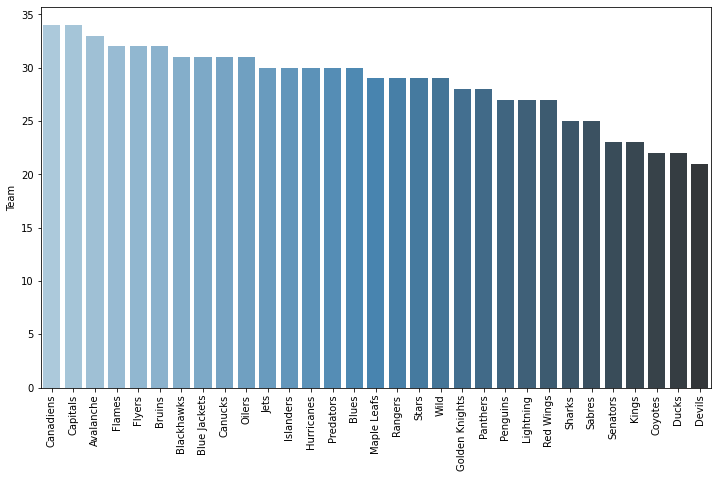

In [ ]:
plt.figure(figsize=(12, 7))
sns.barplot(x=df.loc[:, "Team"].value_counts().index, 
            y=df.loc[:, "Team"].value_counts(),
            palette="Blues_d")
plt.xticks(rotation="vertical");

In [6]:
# Assign each team to certain value
# E.g. Avalanche: 0, Blackhawks: 1, ...
# And reverse
# It can be useful in future tasks

team_names_sorted_list = sorted(list(set(df.iloc[:,0])))
team_class_dict = dict()
reverse_team_class_dict = dict()
for i in tqdm(range(len(team_names_sorted_list))):
  team = team_names_sorted_list[i]
  class_ = i
  team_class_dict[team] = class_
  reverse_team_class_dict[class_] = team

100%|██████████| 31/31 [00:00<00:00, 163963.96it/s]


### 1. Prepare data

In [7]:
import torch
from torch import nn
from torch import optim
from torch.nn import functional as F
from torch.utils.data import Dataset, DataLoader
from torch.utils.data.sampler import SubsetRandomSampler
import torchvision
from torchvision import datasets, transforms

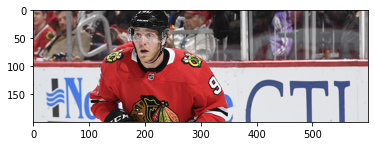

In [8]:
img = plt.imread("/content/drive/My Drive/players_photos/Blackhawks/player_33.jpg")
plt.imshow(img);

In [ ]:
img.shape

(200, 600, 3)

#### Data processing

In [9]:
# Check how datasets.ImageFolder works
data = datasets.ImageFolder(root=PATH)

In [10]:
# One of the problem is that we deleted some of the players with empty images
# This means that if we randomly take a value between 0 and 885
# And obtain value with deleted player then we will ger an error
# That's why we need to create a list with only left players

player_idxs = []
teams = os.listdir(PATH)
for team in tqdm(teams):
  folder_path = os.path.join(PATH, team)
  folder = os.listdir(folder_path)
  for player in folder:
    if player[:6] == "player":
      dot = player.find(".")
      idx = int(player[7:dot])
      player_idxs.append(idx)

100%|██████████| 31/31 [00:00<00:00, 1750.29it/s]


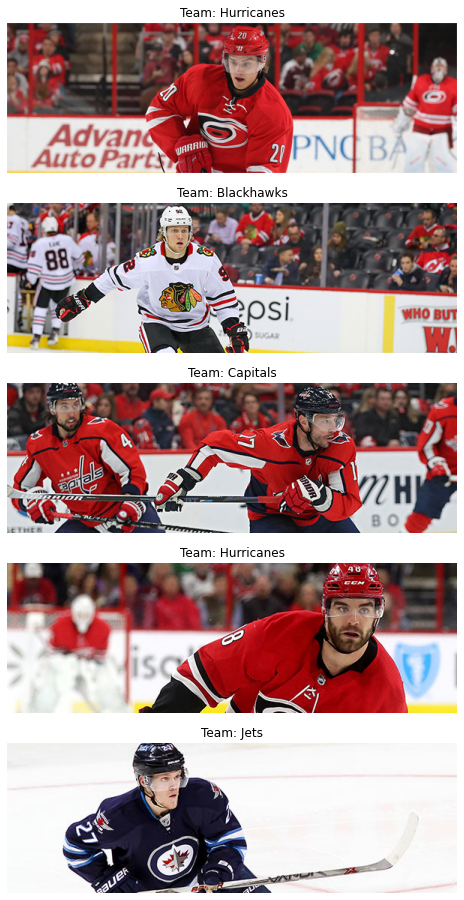

In [11]:
# Check image and assigning team

fig = plt.figure(figsize=(30, 16))
for i in range(5):
  data_point = random.choice(range(len(data)))
  pl = data[data_point]
  sub = fig.add_subplot(5, 1, i+1)
  sub.set_title(f"Team: {reverse_team_class_dict[pl[1]]}")
  plt.axis("off")
  plt.imshow(pl[0])
plt.show();

Looks fine... \
Create train and validation dataloaders

In [12]:
def get_train_and_valid_dataloaders(root, valid_size, batch_size, transform=None):
  # Create train and validation datasets from root folder
  train_data = datasets.ImageFolder(root=root, transform=transform["train"])
  valid_data = datasets.ImageFolder(root=root, transform=transform["valid"])

  # Get indices for train and valid data
  num = len(train_data)
  indices = list(range(num))
  split = int(valid_size * num)
  np.random.shuffle(indices)
  train_idx, valid_idx = indices[split:], indices[:split]

  # Create samplers for dataloaders
  train_sampler = SubsetRandomSampler(train_idx)
  valid_sampler = SubsetRandomSampler(valid_idx)

  # Create train and valid dataloaders
  traindataloader = DataLoader(train_data, 
                               batch_size=batch_size,
                               sampler=train_sampler)
  
  validdataloader = DataLoader(valid_data, 
                               batch_size=batch_size,
                               sampler=valid_sampler)
  
  return traindataloader, validdataloader

In [13]:
# Add augmentation

transform = {"train": transforms.Compose([
                                transforms.RandomHorizontalFlip(p=0.5),
                                transforms.RandomVerticalFlip(p=0.5),
                                transforms.RandomRotation(45),
                                transforms.Resize((200, 200)),
                                transforms.ToTensor(),
                                transforms.Normalize(mean = [0.5, 0.5, 0.5],
                                                    std = [0.5, 0.5, 0.5])]),
             "valid": transforms.Compose([
                                transforms.Resize([200, 200]),
                                transforms.ToTensor(),
                                transforms.Normalize(mean = [0.5, 0.5, 0.5],
                                                    std = [0.5, 0.5, 0.5])
                                ])}

In [14]:
train_dataloader, valid_dataloader = get_train_and_valid_dataloaders(PATH,
                                                                     valid_size=0.3,
                                                                     batch_size=16,
                                                                     transform=transform)

In [32]:
print(len(valid_dataloader.dataset.classes))

31


### 2. Model creation

In [15]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

Let's start with simple custom CNN

In [16]:
class NHLModel(nn.Module):
  def __init__(self, num_out):
    super(NHLModel, self).__init__()

    # Convolution part
    self.cnn = nn.Sequential(
        # 1st layer
        nn.Conv2d(3, 4, kernel_size=3),
        nn.BatchNorm2d(4),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2),
        # 2nd layer
        nn.Conv2d(4, 6, kernel_size=3),
        nn.BatchNorm2d(6),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2),
        # 3rd layer
        nn.Conv2d(6, 8, kernel_size=3),
        nn.BatchNorm2d(8),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2),
        # 4th layer
        nn.Conv2d(8, 8, kernel_size=3),
        nn.BatchNorm2d(8),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2),
    )

    # Linear part
    self.linear = nn.Sequential(
        nn.Linear(10 * 10 * 8, 500),
        nn.ReLU(),
        nn.Linear(500, 100),
        nn.ReLU(),
        nn.Linear(100, num_out)
    )


  def forward(self, x):

    x = self.cnn(x)
    x = x.view(-1, 10 * 10 * 8)
    x = self.linear(x)

    return x

In [ ]:
class PerceptronModel(nn.Module):
  def __init__(self):
    super(PerceptronModel, self).__init__()
    
    self.linear = nn.Sequential(
        nn.Linear(120000, 1000),
        nn.ReLU(),
        nn.Linear(1000, 100),
        nn.ReLU(),
        nn.Linear(100, 31)
    )

  def forward(self, x):

    x = x.view(-1, 120000)
    x = self.linear(x)

    return x

### 3. Training

In [66]:
# Define model
model = NHLModel(31).to(device)

# model = PerceptronModel().to(device)

In [67]:
# Optimizer, in our case is Adam
optimizer = optim.Adam(model.parameters(), lr=0.0005)

In [68]:
# Loss function
criterion = nn.CrossEntropyLoss().to(device)

Define training process

In [69]:
from copy import deepcopy

In [21]:
num_epochs = 200
log_period = 25

best_model = deepcopy(model)
best_loss = 10e4

for epoch in range(num_epochs):
  # print(f"Start epoch: {epoch}")
  # Train the model
  model.train()
  # Set loss for training
  train_loss = 0
  # Set values to calculate acccuracy
  train_correct = 0
  train_total = 0
  for X, y in train_dataloader:
    # Put X and y to the device 
    X = X.to(device)
    y = y.to(device)
    # Make gradients equal to 0
    optimizer.zero_grad()
    # Make prediction
    predict = model(X)
    # Calculare loss
    loss = criterion(predict, y)
    # Perform backward pass
    loss.backward()
    # Optimize parameters
    optimizer.step()
    # Add loss value to overall train loss
    train_loss += loss.item()
    # Calculate accuracy
    predicted_idxs = torch.argmax(predict, dim=1)
    train_total += y.size(0)
    train_correct += (predicted_idxs == y).sum().item()
  # Set model to validation mode
  model.eval()
  # Set loss for validation
  valid_loss = 0
  # Set accuracy values for validation
  valid_correct = 0
  valid_total = 0
  for X_val, y_val in valid_dataloader:
    with torch.no_grad():
      X_val = X_val.to(device)
      y_val = y_val.to(device)

      predict = model(X_val)
      loss = criterion(predict, y_val)
      valid_loss += loss.item()

      predicted_idxs = torch.argmax(predict, dim=1)
      valid_total += y_val.size(0)
      valid_correct += (predicted_idxs == y_val).sum().item()

  tr_loss = train_loss/len(train_dataloader)
  val_loss = valid_loss/len(valid_dataloader)
  tr_acc = train_correct/train_total
  val_acc = valid_correct/valid_total

  if val_loss < best_loss:
    best_model = deepcopy(model)
    best_loss = val_loss
  
  if epoch % log_period == 0 or epoch == num_epochs:
    print(f"Epoch: {epoch}.")
    print(f"Train loss: {tr_loss}. Valid loss: {val_loss}.")
    print(f"Train accuracy: {tr_acc}. Valid accuracy: {val_acc}")


Epoch: 0.
Train loss: 3.440028088433402. Valid loss: 3.4183045864105224.
Train accuracy: 0.034050179211469536. Valid accuracy: 0.03765690376569038
Epoch: 25.
Train loss: 1.713770454270499. Valid loss: 1.9847615003585815.
Train accuracy: 0.4175627240143369. Valid accuracy: 0.3305439330543933
Epoch: 50.
Train loss: 1.103341920035226. Valid loss: 1.7396685600280761.
Train accuracy: 0.6218637992831542. Valid accuracy: 0.5355648535564853
Epoch: 75.
Train loss: 0.8427492218358176. Valid loss: 1.682173228263855.
Train accuracy: 0.7060931899641577. Valid accuracy: 0.5815899581589958
Epoch: 100.
Train loss: 0.5876632856471198. Valid loss: 2.1327829400698346.
Train accuracy: 0.8010752688172043. Valid accuracy: 0.5188284518828452
Epoch: 125.
Train loss: 0.4805445304938725. Valid loss: 1.9707008838653564.
Train accuracy: 0.8512544802867383. Valid accuracy: 0.5564853556485355
Epoch: 150.
Train loss: 0.37554633979286467. Valid loss: 1.9518368403116861.
Train accuracy: 0.8691756272401434. Valid accur

Do not forget to save model parameters!

In [22]:
torch.save(model.state_dict(), "nhl_model_2410_lr_5e-4.pth")

### 4. Validation of the model

In [63]:
# Create model and download parameters for it
model2 = NHLModel(31)
model2.load_state_dict(torch.load("nhl_model_2410_lr_5e-4.pth"))
model2.to(device)

NHLModel(
  (cnn): Sequential(
    (0): Conv2d(3, 4, kernel_size=(3, 3), stride=(1, 1))
    (1): BatchNorm2d(4, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
    (3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (4): Conv2d(4, 6, kernel_size=(3, 3), stride=(1, 1))
    (5): BatchNorm2d(6, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (6): ReLU()
    (7): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (8): Conv2d(6, 8, kernel_size=(3, 3), stride=(1, 1))
    (9): BatchNorm2d(8, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (10): ReLU()
    (11): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (12): Conv2d(8, 8, kernel_size=(3, 3), stride=(1, 1))
    (13): BatchNorm2d(8, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (14): ReLU()
    (15): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, 

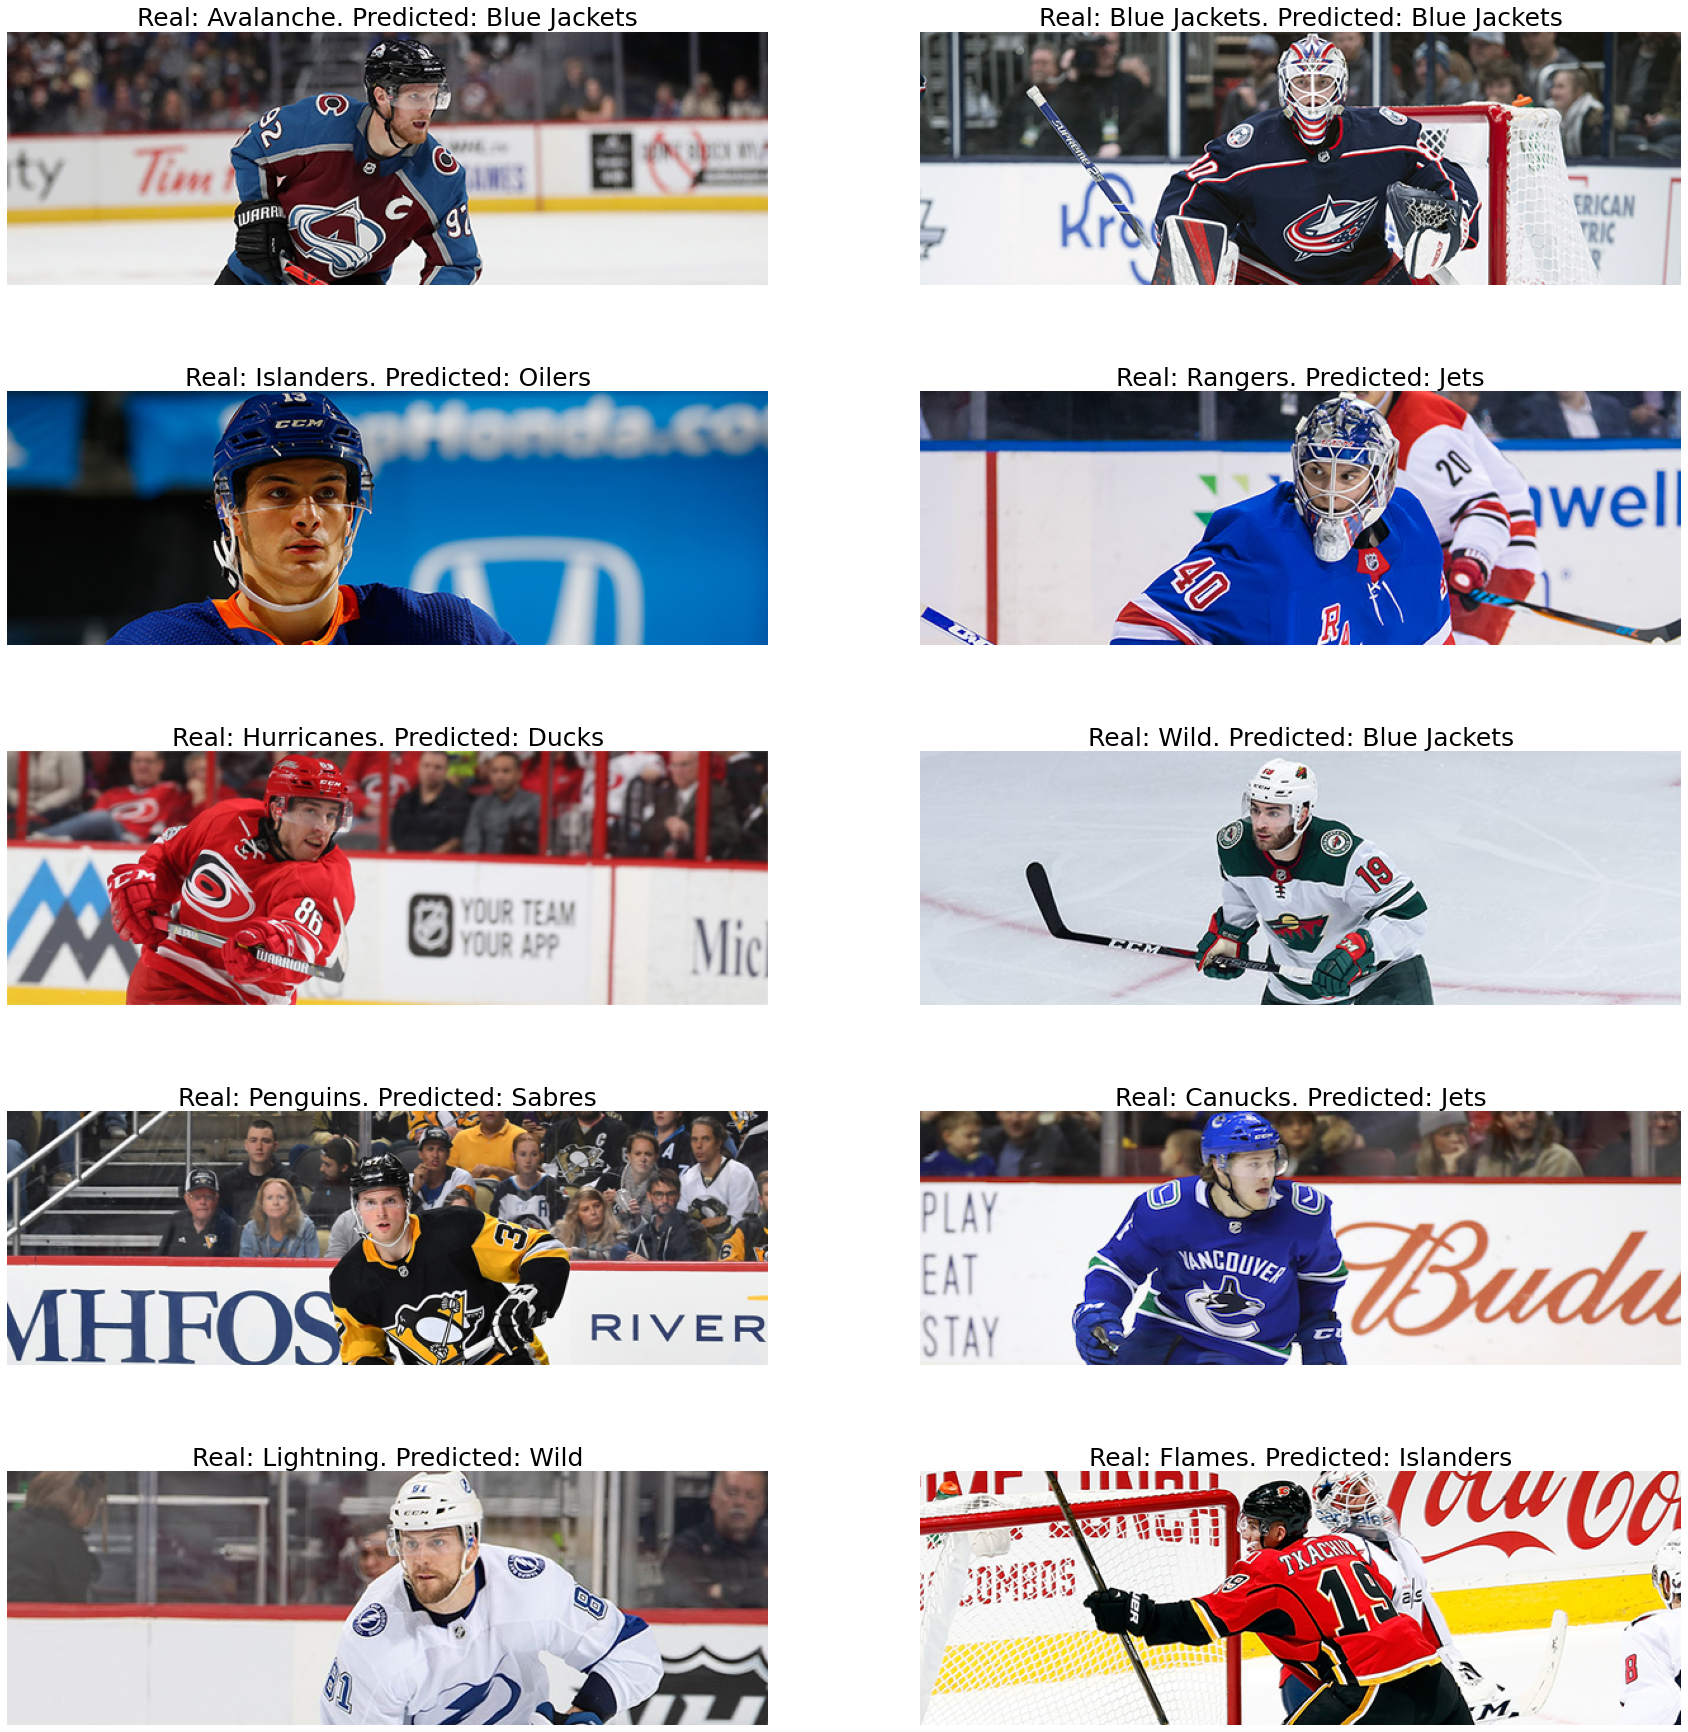

In [65]:
# Randomly choose a player and validate prediction of the team

fig = plt.figure(figsize=(30, 32))
model.train()
for i in range(10):
  data_point = random.choice(range(len(data)))
  pl = data[data_point]
  inp = transform["valid"](pl[0])
  inp = inp.view(1, inp.shape[0], inp.shape[1], inp.shape[2]).to(device)
  predict = model2(inp)
  predicted_team = np.argmax(predict.cpu().detach().numpy())
  sub = fig.add_subplot(5, 2, i+1)
  sub.set_title(f"Real: {reverse_team_class_dict[pl[1]]}. Predicted: {reverse_team_class_dict[predicted_team]}", fontsize=25)
  plt.axis("off")
  plt.imshow(pl[0])
plt.show();

### 5. Metrics

Let's evaluate our model's prediction ability using different metrics for classification.

In our implementation we will the following metrics: accuracy, confusion matrix, precision, recall, f1, roc auc

In [24]:
# Let's make predictions on the whole dataset and then analyze predictions
# So first let's create test dataloader

test_data = datasets.ImageFolder(root=PATH, transform=transform["valid"])
test_dataloader = DataLoader(test_data, 
                             batch_size=1,
                             shuffle=True)

In [48]:
reals = []
predicts = []


for x_test, y_test in tqdm(test_dataloader):
  with torch.no_grad():
    x_test = x_test.to(device)
    predict = model(x_test)
    y_predicted = np.argmax(predict.cpu().detach().numpy())
    reals.append(y_test.item())
    predicts.append(y_predicted)

100%|██████████| 797/797 [00:06<00:00, 129.84it/s]


In [49]:
reals[:10]

[12, 3, 26, 13, 29, 2, 8, 0, 13, 23]

In [50]:
predicts[:10]

[21, 3, 26, 30, 17, 2, 30, 0, 3, 15]

In [72]:
from torch.autograd import Variable

In [76]:
def conf_mtrx(model, test_batch_gen,nb_classes = 5):
    confusion_matrix = torch.zeros(nb_classes, nb_classes)
    with torch.no_grad():
        for i, (X_batch, y_batch) in enumerate(test_batch_gen):
            outputs = model(Variable(torch.FloatTensor(X_batch)).cuda())
            _, preds = torch.max(outputs, 1)
            # print(y_batch.view(-1), '-----')
            # print(preds.view(-1))
            for t, p in zip(y_batch.view(-1), preds.view(-1)):
                confusion_matrix[t.long(), p.long()] += 1

    print(confusion_matrix)
    res_percent = confusion_matrix.diag()/confusion_matrix.sum(1)
    print(res_percent)
    print(res_percent.mean())

    return confusion_matrix


In [79]:
m = conf_mtrx(model, train_dataloader, 31)

tensor([[0., 0., 3., 9., 2., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.,
         3., 3., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 2., 6., 4., 0., 0., 2., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         1., 5., 0., 0., 2., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 8., 2., 0., 0., 6., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 7., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 2., 7., 3., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         1., 4., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
        [0., 0., 0., 5., 3., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 2.,
         6., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 1., 7., 1., 0., 0., 2., 0., 0., 0., 0., 1., 0., 0., 0., 0., 1.,
         0., 4., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 8., 2., 0., 0., 2., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         3., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],

In [80]:
m.diag()

tensor([0., 0., 0., 7., 3., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 2.,
        1., 7., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

Trained model always returns the same probability distribution!
Some ideas to solve:
* More data augmentation
* Change loss and learning rate
* Change batch size
* Change architecture of the network
* Try to use pretrained model (will it help?)

### Observations

* 22.10
1. Stacking more convolution layers and adding data augmentation did improve accuracy on training data: 30 epochs gave 0.35 accuracy on NHLModel.
2. There are images with just empty ice, they are must be deleted.
3. Some of the team the model starts to predict correct!

## Ideas

* 22.10
1. Add more epochs. If at some point learning stops, increase conv layers.
2. Crop frames from videos.